In [1]:
# Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# Make results reproducible
#seed = 1235
#np.random.seed(seed)
#tf.set_random_seed(seed)

In [3]:
#Loading the dataset
X = np.load('male_array_1.npy')
data_Y = np.load('male_array_2.npy')
#X = X[:300000]
#data_Y = data_Y[:300000]
data_Y = pd.DataFrame(data_Y)
data_Y.columns = ['혈당', '수축기혈압', '이완기혈압', '총콜레스테롤','HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백']
#Y = pd.get_dummies(data_Y['혈당'])
#y = np.array(Y)


In [4]:
label = '혈당'

y = data_Y[label]
len(y)

528891

In [6]:
hello = pd.DataFrame(y)

len(hello[hello['혈당'] == 1])/float(len(hello))

0.5801838185940014

In [7]:
#y = pd.get_dummies(y)
y = np.array(y)


In [8]:
y

array([1., 1., 1., ..., 3., 2., 2.])

In [9]:
# Creating a Train and a Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# XGBoost

In [16]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

In [17]:
xgb = XGBClassifier()

In [18]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
xgb.score(X_test, y_test)

/home/pem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5873335198868578

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb.predict(X_test)))

In [15]:
print(classification_report(y_test, xgb.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.61      0.93      0.73     76860
        2.0       0.43      0.14      0.22     43384
        3.0       0.30      0.00      0.00     11979

avg / total       0.52      0.59      0.50    132223



/home/pem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
%matplotlib inline

In [14]:
X_test

array([[13.        ,  9.45196458,  8.70392301,  9.47236548,  3.        ],
       [ 9.        , 11.69014871, 10.00639853,  8.9226827 ,  2.        ],
       [14.        ,  8.70590321,  9.13808152, 10.35185792,  1.        ],
       ...,
       [12.        , 10.94408733, 10.00639853, 10.02204825,  2.        ],
       [ 8.        , 11.69014871, 12.61134955, 11.45122347,  1.        ],
       [12.        , 10.19802596,  8.26976451,  9.58230203,  3.        ]])

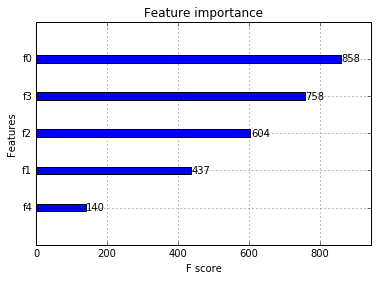

In [15]:
plot_importance(xgb)

In [17]:
#파라미터 최적화
from sklearn.model_selection import GridSearchCV

In [18]:
xgb_params = {'objective': ['reg:logistic', 'reg:gamma'],
             'learning_rate': [0.001, 0.01, 0.1],
             'max_depth': [4, 6, 8], 
             'gamma': [0.01, 0.1, 1]}

In [19]:
xgb = XGBClassifier()

In [20]:
gs_xgb = GridSearchCV(xgb, xgb_params, n_jobs = -1,
                     cv = 4, verbose = 4)

In [ ]:
gs_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


In [ ]:
gs_xgb.best_params_

In [ ]:
gs_xgb.xcore(x_test, y_test)